In [249]:
%matplotlib inline
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt 
import string
import emoji
import nltk
from textblob import TextBlob
nltk.download('words')
words = set(nltk.corpus.words.words())
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
# ML Libraries
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC, SVC
from nltk.classify import NaiveBayesClassifier, MaxentClassifier, SklearnClassifier

# Global Parameters
#stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package words to /Users/jtangesq/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [250]:
df = pd.read_csv('../Resources/covid_vaccine_090721.csv',encoding = 'ISO-8859-1') #Dataset from Twitter API
df.head()


,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,NSW Multicultural Health Communication Service,NaN,Official account for NSW Multicultural Health ...,2018-08-20 02:00:05,1277,243,2311,True,2021-09-06 23:55:48,âPlease get vaccinated. Take COVID seriously...,NaN,TweetDeck,False
1,Climate Detective,NaN,Physicist (MA & PhD) & socialist exploring cli...,2020-11-07 17:03:33,94,155,354,False,2021-09-06 23:46:16,@apsmunro That is a lot more than the risk fro...,['CovidVaccine'],Twitter Web App,False
2,david sirias,"Port Townsend, WA",Lefty songwriter/musician/producer/publisher. ...,2011-10-28 20:14:55,1262,1115,489,False,2021-09-06 23:38:34,"As I said months ago, anyone supporting a blan...","['FascistEmployerMandate', 'FascistVaccinePass...",Twitter for iPad,False
3,COVID News,Estados Unidos,News about COVID-19,2013-06-05 08:52:31,3330,1472,130,False,2021-09-06 23:36:50,More crazy Chiropractors!!! This time in Flori...,NaN,Revive Social App,False
4,gain-of-function research,Undr the pine hunting lobsters,@Ayjchan's mandate: 'ONLY look @ a -Leak- frm ...,2013-12-24 20:30:14,272,20,24001,False,2021-09-06 23:29:20,Great 18 point case about why you should not t...,"['CovidVaccine', 'COVIDVaccination']",Twitter for Android,False


In [251]:
n_df = df.drop(columns = ['user_name', 'user_location','user_description','user_created',
                         'user_followers','user_friends','user_favourites','source','is_retweet'], axis = 1)
n_df

,user_verified,date,text,hashtags
0,True,2021-09-06 23:55:48,âPlease get vaccinated. Take COVID seriously...,NaN
1,False,2021-09-06 23:46:16,@apsmunro That is a lot more than the risk fro...,['CovidVaccine']
2,False,2021-09-06 23:38:34,"As I said months ago, anyone supporting a blan...","['FascistEmployerMandate', 'FascistVaccinePass..."
3,False,2021-09-06 23:36:50,More crazy Chiropractors!!! This time in Flori...,NaN
4,False,2021-09-06 23:29:20,Great 18 point case about why you should not t...,"['CovidVaccine', 'COVIDVaccination']"
...,...,...,...,...
5674,False,2021-09-01 00:04:20,Excellent summary of where we are headed as a ...,NaN
5675,False,2021-09-01 00:02:26,@krispykreme is #sweetening its #COVIDvaccine ...,"['sweetening', 'COVIDvaccine']"
5676,False,2021-09-01 00:02:16,#CovidVaccine Does not work.. https://t.co/Xoi...,['CovidVaccine']
5677,False,2021-09-01 00:00:41,"We are excited to be soaring together again, b...",NaN


In [252]:
#regex the hashtags 
#n_df['hashtags'] = n_df['hashtags'].apply(lambda x: re.sub('\[.*?\]',' ', str(x)))
n_df['hashtags'] = n_df['hashtags'].str.replace("[^a-zA-Z#]", " ")
n_df.head()

/Users/jtangesq/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


,user_verified,date,text,hashtags
0,True,2021-09-06 23:55:48,âPlease get vaccinated. Take COVID seriously...,NaN
1,False,2021-09-06 23:46:16,@apsmunro That is a lot more than the risk fro...,CovidVaccine
2,False,2021-09-06 23:38:34,"As I said months ago, anyone supporting a blan...",FascistEmployerMandate FascistVaccinePass...
3,False,2021-09-06 23:36:50,More crazy Chiropractors!!! This time in Flori...,NaN
4,False,2021-09-06 23:29:20,Great 18 point case about why you should not t...,CovidVaccine COVIDVaccination


In [253]:
def cleaner(tweet):
    tweet = re.sub("@[A-Za-z0-9]+","",tweet) #Remove @ sign
    tweet = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", tweet) #Remove http links
    tweet = " ".join(tweet.split())
    tweet = ''.join(c for c in tweet if c not in emoji.UNICODE_EMOJI) #Remove Emojis
    tweet = tweet.replace("#", "").replace("_", " ") #Remove hashtag sign but keep the text
    tweet = " ".join(w for w in nltk.wordpunct_tokenize(tweet) \
         if w.lower() in words or not w.isalpha())
    return tweet
n_df['text'] = n_df['text'].map(lambda x: cleaner(x))
#n_df.to_csv('') #specify location

In [254]:
#remove short words less than three letters 
n_df['text'] = n_df['text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
#lower case all texts
n_df['text']=n_df["text"].str.lower()

In [255]:
tokenized_tweets = n_df['text'].apply(lambda x: x.split())
tokenized_tweets.head()

0         [please, take, covid, seriously, joke, from]
1    [that, more, than, risk, from, risk, from, vac...
2                  [said, anyone, supporting, blanket]
3    [more, crazy, this, time, where, medical, doct...
4            [great, point, case, about, should, take]
Name: text, dtype: object

In [256]:
#Stemming is a rule-based process of stripping the suffixes (“ing”, “ly”, “es”, “s” etc) from a word. 
#For example, For example – “play”, “player”, “played”, “plays” and “playing” are the different variations of the word – “play”.
stemmer = PorterStemmer()

tokenized_tweets = tokenized_tweets.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_tweets.head()

0            [pleas, take, covid, serious, joke, from]
1    [that, more, than, risk, from, risk, from, vac...
2                      [said, anyon, support, blanket]
3    [more, crazi, thi, time, where, medic, doctor,...
4            [great, point, case, about, should, take]
Name: text, dtype: object

In [257]:
for i in range(len(tokenized_tweets)):
    tokenized_tweets[i] = ' '.join(tokenized_tweets[i])

n_df['tokenized']= tokenized_tweets

In [258]:
n_df.head()

,user_verified,date,text,hashtags,tokenized
0,True,2021-09-06 23:55:48,please take covid seriously joke from,NaN,pleas take covid serious joke from
1,False,2021-09-06 23:46:16,that more than risk from risk from vaccine pos...,CovidVaccine,that more than risk from risk from vaccin possibl
2,False,2021-09-06 23:38:34,said anyone supporting blanket,FascistEmployerMandate FascistVaccinePass...,said anyon support blanket
3,False,2021-09-06 23:36:50,more crazy this time where medical doctor writ...,NaN,more crazi thi time where medic doctor write mask
4,False,2021-09-06 23:29:20,great point case about should take,CovidVaccine COVIDVaccination,great point case about should take


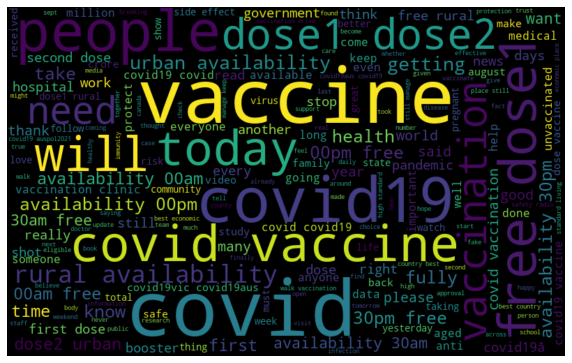

In [259]:
all_words = ' '.join([text for text in n_df['text']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [260]:

n_df['polarity'] = n_df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)
n_df['subjectivity'] = n_df['text'].apply(lambda x: TextBlob(x).sentiment.subjectivity)
n_df.head()

,user_verified,date,text,hashtags,tokenized,polarity,subjectivity
0,True,2021-09-06 23:55:48,please take covid seriously joke from,NaN,pleas take covid serious joke from,-0.333333,0.666667
1,False,2021-09-06 23:46:16,that more than risk from risk from vaccine pos...,CovidVaccine,that more than risk from risk from vaccin possibl,0.250000,0.750000
2,False,2021-09-06 23:38:34,said anyone supporting blanket,FascistEmployerMandate FascistVaccinePass...,said anyon support blanket,0.250000,0.250000
3,False,2021-09-06 23:36:50,more crazy this time where medical doctor writ...,NaN,more crazi thi time where medic doctor write mask,-0.033333,0.466667
4,False,2021-09-06 23:29:20,great point case about should take,CovidVaccine COVIDVaccination,great point case about should take,0.800000,0.750000


In [261]:
def analyze_sentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(cleaner(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [262]:
# We create a column with the result of the analysis:
n_df['SA'] = np.array([ analyze_sentiment(tweet) for tweet in n_df['text'] ])

In [263]:
n_df.head()

,user_verified,date,text,hashtags,tokenized,polarity,subjectivity,SA
0,True,2021-09-06 23:55:48,please take covid seriously joke from,NaN,pleas take covid serious joke from,-0.333333,0.666667,-1
1,False,2021-09-06 23:46:16,that more than risk from risk from vaccine pos...,CovidVaccine,that more than risk from risk from vaccin possibl,0.250000,0.750000,1
2,False,2021-09-06 23:38:34,said anyone supporting blanket,FascistEmployerMandate FascistVaccinePass...,said anyon support blanket,0.250000,0.250000,1
3,False,2021-09-06 23:36:50,more crazy this time where medical doctor writ...,NaN,more crazi thi time where medic doctor write mask,-0.033333,0.466667,-1
4,False,2021-09-06 23:29:20,great point case about should take,CovidVaccine COVIDVaccination,great point case about should take,0.800000,0.750000,1


In [270]:
#n_df.to_csv('../Resources/labelled_tweets.csv',index=False)

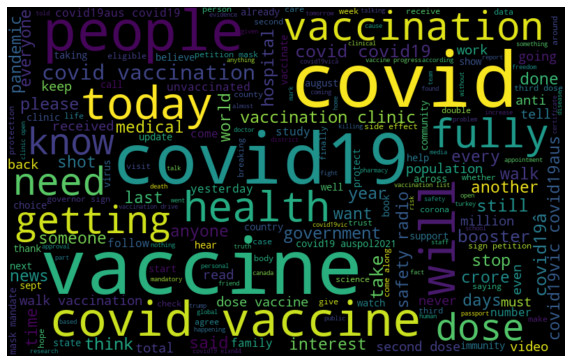

In [265]:
neu_words =' '.join([text for text in n_df['text'][n_df['SA'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(neu_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

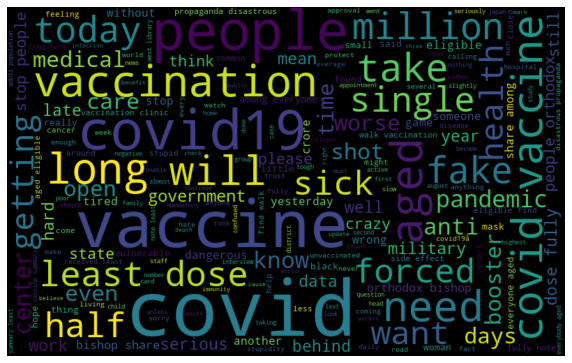

In [266]:
neg_words = ' '.join([text for text in n_df['text'][n_df['SA'] == -1]])
wordcloud = WordCloud(width=800, height=500,
random_state=21, max_font_size=110).generate(neg_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

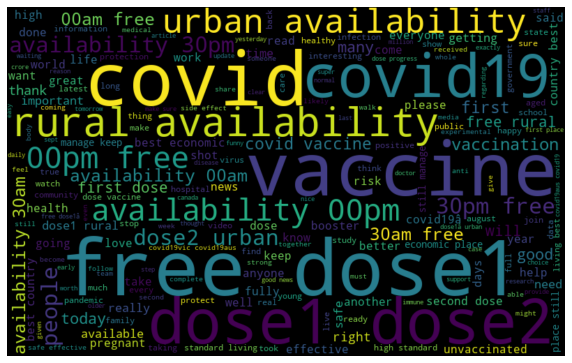

In [267]:
pos_words = ' '.join([text for text in n_df['text'][n_df['SA'] > 0]])
wordcloud = WordCloud(width=800, height=500,
random_state=21, max_font_size=110).generate(pos_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

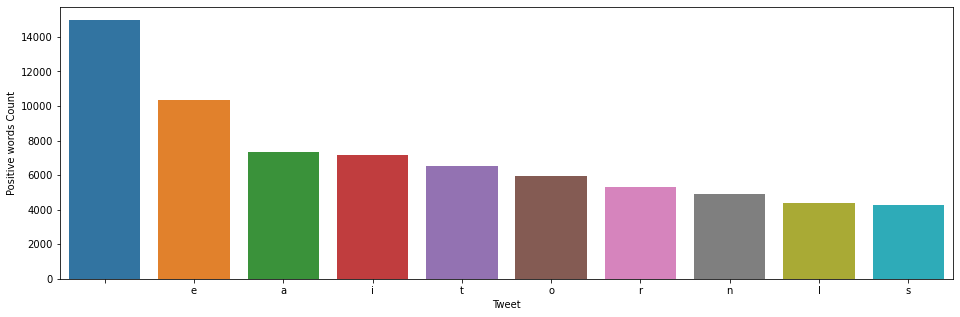

In [287]:
import seaborn as sns
a = nltk.FreqDist(pos_words)
d = pd.DataFrame({'Tweet': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent words    
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Tweet", y = "Count")
ax.set(ylabel = 'Positive words Count')
plt.show()

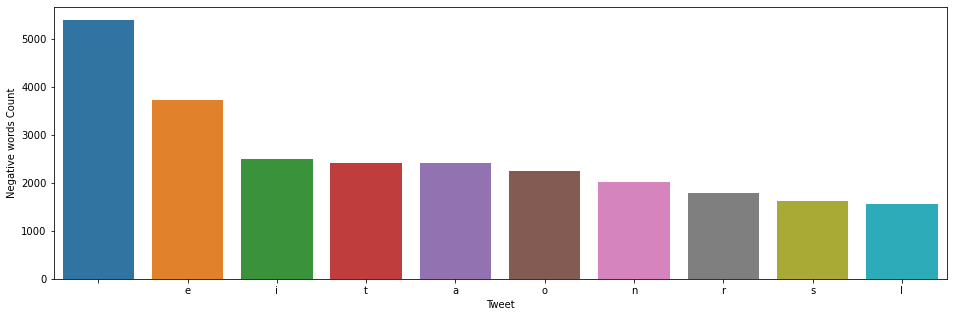

In [288]:
b = nltk.FreqDist(neg_words)
e = pd.DataFrame({'Tweet': list(b.keys()),
                  'Count': list(b.values())})
# selecting top 10 most frequent words    
e = e.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=e, x= "Tweet", y = "Count")
ax.set(ylabel = 'Negative words Count')
plt.show()

In [271]:
#tweet text cleaning option 2: 
def clean_tweet(temp):
    
    #for temp in range(0, len(n_df)) :
         #if type(temp) == float:
         #    return ""
         #else: 
            #print(temp)
    temp = temp.lower()
    temp = re.sub("'", "", str(temp)) # to avoid removing contractions in english
    temp = re.sub("@[A-Za-z0-9_]+","", str(temp))
    temp = re.sub("#[A-Za-z0-9_]+","", str(temp))
    temp = re.sub(r"www.\S+", "", temp)
    temp = re.sub(r"http\S+", "", temp)
    temp = re.sub('[()!?]', ' ', temp)
    temp = re.sub('\[.*?\]',' ', temp)
    temp = re.sub("[^a-z0-9]"," ", temp)
    temp = temp.split()
    stopwords = ["for", "on", "an", "a", "of", "and", "in", "the", "to", "from"]
    temp = [w for w in temp if not w in stopwords]
    temp = " ".join(word for word in temp)
    return temp
n_df['text'] = n_df['text'].map(lambda x: clean_tweet(x))
n_df.head()

,user_verified,date,text,hashtags,tokenized,polarity,subjectivity,SA
0,True,2021-09-06 23:55:48,please take covid seriously joke,NaN,pleas take covid serious joke from,-0.333333,0.666667,-1
1,False,2021-09-06 23:46:16,that more than risk risk vaccine possibly,CovidVaccine,that more than risk from risk from vaccin possibl,0.250000,0.750000,1
2,False,2021-09-06 23:38:34,said anyone supporting blanket,FascistEmployerMandate FascistVaccinePass...,said anyon support blanket,0.250000,0.250000,1
3,False,2021-09-06 23:36:50,more crazy this time where medical doctor writ...,NaN,more crazi thi time where medic doctor write mask,-0.033333,0.466667,-1
4,False,2021-09-06 23:29:20,great point case about should take,CovidVaccine COVIDVaccination,great point case about should take,0.800000,0.750000,1


In [269]:
#n_df.to_csv('../Resources/cleaned_tweets_train.csv',index=False)

In [289]:
SentimentText = n_df['text']
SentimentText

0                        please take covid seriously joke
1               that more than risk risk vaccine possibly
2                          said anyone supporting blanket
3       more crazy this time where medical doctor writ...
4                      great point case about should take
                              ...                        
5674    excellent summary where headed race after ever...
5675          sweetening deal through sept will give away
5676                                            does work
5677    excited soaring together again help stay toget...
5678    beth cover vaccine research propaganda hesitat...
Name: text, Length: 5679, dtype: object

In [290]:
sentiment_text_list = SentimentText
textfile = open("../Resources/sentiment_text_list.txt", "w")
for element in sentiment_text_list:
    textfile.write(element + "\n")
textfile.close()

In [228]:
# #lower case
# temp = df['text'].str.lower()
# temp

In [229]:
#remove the mentions and hashtags 
# temp = re.sub("@[A-Za-z0-9_]+","", str(temp))
# temp = re.sub("#[A-Za-z0-9_]+","", str(temp))
# print(temp)

In [230]:
#remove links 
# temp = re.sub(r"http\S+", "", temp)
# temp = re.sub(r"www.\S+", "", temp)
# print(temp)

In [231]:
# #remove punctuations
# temp = re.sub('[()!?]', ' ', temp)
# temp = re.sub('\[.*?\]',' ', temp)
# temp

In [232]:
# #Filtering non-alphanumeric characters
# temp = re.sub("[^a-z0-9]"," ", temp)
# print(temp)

In [233]:
# #tokenize 
# temp = temp.split()
# print(temp)


In [234]:
# #remove stopwords
# stopwords = ["for", "on", "an", "a", "of", "and", "in", "the", "to", "from"]
 
# temp = [w for w in temp if not w in stopwords]
# temp = " ".join(word for word in temp)
# print(temp)

In [173]:
def get_feature_vector(train_fit):
    vector = TfidfVectorizer(sublinear_tf=True)
    vector.fit(train_fit)
    return vector

In [174]:
def int_to_string(sentiment):
    if sentiment == 0:
        return "Negative"
    elif sentiment == 2:
        return "Neutral"
    else:
        return "Positive"

*TRAIN WITH LOGISTICS REGRESSION MODEL 

*TRAIN WITH NAIVE BAYES MODEL 

In [318]:
#https://github.com/adibyte95/Twittter-sentiment-analysis 

# function to plot confusion matrix
# this function is from sklearn website
# link - http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 3.
    for i, j, k in itertools.product(range(cm.shape[0]), range(cm.shape[1], range(cm.shape[-1]))):
        plt.text(k, j, i, format(cm[i, j, k], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j, k] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [319]:
#Finding the unigram representation
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer()

In [320]:
# loading the cleaned training tweets
# import pickle

# with open('../Resources/sentiment_text_list.txt', 'rb') as f:
#     st = pickle.load(f)

In [330]:
# fitting the vectorizer
X=vectorizer.fit_transform(SentimentText)
print(X)

  (0, 2795)	1
  (0, 3675)	1
  (0, 987)	1
  (0, 3308)	1
  (0, 2098)	1
  (1, 3729)	1
  (1, 2444)	1
  (1, 3723)	1
  (1, 3177)	2
  (1, 3982)	1
  (1, 2830)	1
  (2, 3219)	1
  (2, 347)	1
  (2, 3619)	1
  (2, 539)	1
  (3, 2444)	1
  (3, 1021)	1
  (3, 3751)	1
  (3, 3774)	1
  (3, 4107)	1
  (3, 2364)	1
  (3, 1249)	1
  (3, 4173)	1
  (3, 2341)	1
  (4, 3675)	1
  :	:
  (5675, 4127)	1
  (5675, 1089)	1
  (5675, 445)	1
  (5675, 3766)	1
  (5675, 3303)	1
  (5675, 1713)	1
  (5675, 3653)	1
  (5676, 1252)	1
  (5676, 4152)	1
  (5677, 1834)	1
  (5677, 271)	1
  (5677, 1825)	1
  (5677, 1646)	1
  (5677, 3787)	2
  (5677, 3518)	1
  (5677, 1453)	1
  (5677, 3422)	1
  (5678, 3982)	1
  (5678, 3431)	1
  (5678, 2732)	1
  (5678, 3127)	1
  (5678, 984)	1
  (5678, 2928)	1
  (5678, 518)	1
  (5678, 1840)	1


In [322]:
# getting the target values i.e wheather the tweets are positive or negative
train_data = pd.read_csv('../Resources/labelled_tweets.csv', encoding = 'ISO-8859-1')
y = train_data['SA']

In [323]:
y.shape

(5679,)

In [324]:
X.shape

(5679, 4200)

In [325]:
# splitting into training and testing set so as to evaluate the classifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train ,y_test = train_test_split(X,y,train_size = .8 , test_size = .2 , random_state = 0)

In [326]:
# fitting the multinomial bayes classifier
clf = MultinomialNB()
clf.fit(X_train, y_train)

MultinomialNB()

In [327]:
clf.score(X_train,y_train)

0.9339643407440018

In [328]:
y_pred = clf.predict(X_test)
# testing score
clf.score(X_test, y_test)

0.8441901408450704

Confusion matrix, without normalization
[[ 69  41  17]
 [ 15 515  25]
 [ 18  61 375]]


NameError: name 'itertools' is not defined

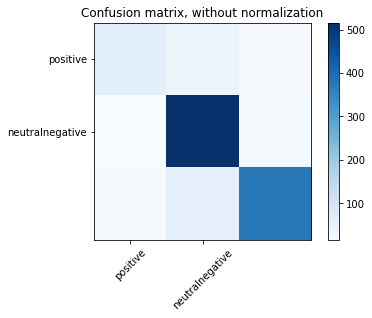

In [329]:
# Compute confusion matrix
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=3)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["positive",'neutral' "negative"],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["positive", 'neutral' "negative"], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [197]:

# Split dataset into Train, Test

# # Same tf vector will be used for Testing sentiments on unseen trending data
# tf_vector = get_feature_vector(np.array(n_df.iloc[:, 1]).ravel())
# X = tf_vector.transform(np.array(n_df.iloc[:, 1]).ravel())
# y = np.array(n_df.iloc[:, 0]).ravel()
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

# # Training Naive Bayes model
# NB_model = MultinomialNB()
# NB_model.fit(X_train, y_train)
# y_predict_nb = NB_model.predict(X_test)
# print(f'Naive-Bayes Model:{accuracy_score(y_test, y_predict_nb)}')

# # Training Logistics Regression model
# LR_model = LogisticRegression(solver='lbfgs')
# LR_model.fit(X_train, y_train)
# y_predict_lr = LR_model.predict(X_test)
# print(f'Logistics Regression Model: {accuracy_score(y_test, y_predict_lr)}')

Naive-Bayes Model:0.9128521126760564
Logistics Regression Model: 0.9128521126760564


Scraping Twitter data via API Call

In [176]:
import tweepy as tw
import config
from tqdm import tqdm
import os

In [177]:
consumer_api_key = config.consumer_key
consumer_api_secret = config.consumer_secret

In [178]:
auth = tw.OAuthHandler(consumer_api_key, consumer_api_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [179]:
search_words = "#covidvaccine -filter:retweets" 

date_since = "2021-09-02"
date_until="2021-09-08"
# Collect tweets
tweets = tw.Cursor(api.search,
              q=search_words,
              lang="en",
              since=date_since,
              until=date_until     
              ).items(7500) 

In [180]:
tweets_copy = []
for tweet in tqdm(tweets):
    tweets_copy.append(tweet)

848it [00:19, 42.49it/s]


In [181]:
print(f"New tweets retrieved: {len(tweets_copy)}")

New tweets retrieved: 848


In [182]:
tweets_df = pd.DataFrame()
for tweet in tqdm(tweets_copy):
    hashtags = []
    try:
        for hashtag in tweet.entities["hashtags"]:
            hashtags.append(hashtag["text"])
    except:
        pass
    tweets_df = tweets_df.append(pd.DataFrame({'user_name': tweet.user.name, 
                                               'user_location': tweet.user.location,\
                                               'user_description': tweet.user.description,
                                               'user_created': tweet.user.created_at,
                                               'user_followers': tweet.user.followers_count,
                                               'user_friends': tweet.user.friends_count,
                                               'user_favourites': tweet.user.favourites_count,
                                               'user_verified': tweet.user.verified,
                                               'date': tweet.created_at,
                                               'text': tweet.text, 
                                               'hashtags': [hashtags if hashtags else None],
                                               'source': tweet.source,
                                               'is_retweet': tweet.retweeted}, index=[0]))

100%|██████████| 848/848 [00:03<00:00, 267.60it/s]


In [183]:
tweets_df

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,Naomi,"Edmonton, Alberta","Franco-canadienne, nature lover, connection se...",2017-04-27 20:49:09,34,147,392,False,2021-09-07 23:59:56,Show of hands who had the following medical is...,None,Twitter for iPhone,False
0,Carlos Mock,"Chicago, IL",Author of The Corner Queen--La Loca de La Esqu...,2009-04-23 22:58:18,380,72,63594,False,2021-09-07 23:59:18,#Florida #doctor says she won’t treat #unvacci...,"[Florida, doctor, unvaccinated, patients, COVI...",Twitter Web App,False
0,🌲Tree🌲Hugging Oregonian,Pacific Northwest USA,🏳️‍🌈#FriendOfDorothy #LGBTQ #CorgiWhipped #Bui...,2009-10-22 10:11:21,6623,7116,68311,False,2021-09-07 23:57:43,Don't be chicken! Get the vaccine!\n#COVIDvacc...,"[COVIDvaccine, DeltaVariant]",Twitter for Android,False
0,Carlos Mock,"Chicago, IL",Author of The Corner Queen--La Loca de La Esqu...,2009-04-23 22:58:18,380,72,63594,False,2021-09-07 23:57:41,#Idaho moves to start #rationing #medical care...,"[Idaho, rationing, medical, COVID19, CovidVacc...",Twitter Web App,False
0,Anff (no DMs)🌼🌷🇬🇧🏴󠁧󠁢󠁥󠁮󠁧󠁿,Bedfordshire,"52 yr old, widowed, teenage son. Politics, hum...",2018-07-07 18:31:04,14508,15149,216370,False,2021-09-07 23:47:59,@JohnTShallow @Crosscolin88 @NHS I notice Isra...,None,Twitter for Android,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,Indian Weekender,Auckland,NZ's #1 and the first weekly newspaper for Kiw...,2009-06-28 06:20:50,1373,1005,3138,False,2021-09-07 01:00:41,"In another milestone, India administered more ...",None,Buffer,False
0,Limey_In_The_US,,,2013-07-03 08:14:02,35,150,1636,False,2021-09-07 00:58:47,@AB81971 @TomiLahren It will be hard to get a ...,None,Twitter for Android,False
0,Amy,"Longview, TX","I am human, I have my own personal opinion on ...",2021-02-22 14:46:09,242,624,7851,False,2021-09-07 00:57:45,😳😱🤭WTF DID HE JUST SAY?! #BillGates #vaccinati...,"[BillGates, vaccination, CovidVaccine, NewWorl...",Twitter for iPhone,False
0,Roberta Henry,"Rogers, AR",#covidwars | #frontlineER Single mom | ER RN |...,2014-04-28 05:36:13,36,202,356,False,2021-09-07 00:56:30,Finally off work…but the echos of cries and of...,None,Twitter for iPhone,False


In [184]:
#tweets_df.to_csv('../Resources/covid_vaccine_090721.csv',index=False)

In [193]:
n_tweets_df = tweets_df.drop(columns = ['user_name', 'user_location','user_description','user_created',
                         'user_followers','user_friends','user_favourites','source','is_retweet'], axis = 1)
n_tweets_df.head()

,user_verified,date,text,hashtags
0,False,2021-09-07 23:59:56,Show of hands who had the following medical is...,None
0,False,2021-09-07 23:59:18,#Florida #doctor says she won’t treat #unvacci...,"[Florida, doctor, unvaccinated, patients, COVI..."
0,False,2021-09-07 23:57:43,Don't be chicken! Get the vaccine!\n#COVIDvacc...,"[COVIDvaccine, DeltaVariant]"
0,False,2021-09-07 23:57:41,#Idaho moves to start #rationing #medical care...,"[Idaho, rationing, medical, COVID19, CovidVacc..."
0,False,2021-09-07 23:47:59,@JohnTShallow @Crosscolin88 @NHS I notice Isra...,None


In [194]:
#regex the hashtags 
#n_df['hashtags'] = n_df['hashtags'].apply(lambda x: re.sub('\[.*?\]',' ', str(x)))
n_tweets_df['hashtags'] = n_tweets_df['hashtags'].str.replace("[^a-zA-Z#]", " ")
n_tweets_df.head()

/Users/jtangesq/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


,user_verified,date,text,hashtags
0,False,2021-09-07 23:59:56,Show of hands who had the following medical is...,NaN
0,False,2021-09-07 23:59:18,#Florida #doctor says she won’t treat #unvacci...,NaN
0,False,2021-09-07 23:57:43,Don't be chicken! Get the vaccine!\n#COVIDvacc...,NaN
0,False,2021-09-07 23:57:41,#Idaho moves to start #rationing #medical care...,NaN
0,False,2021-09-07 23:47:59,@JohnTShallow @Crosscolin88 @NHS I notice Isra...,NaN


In [199]:
#remove short words less than three letters 
n_tweets_df['text'] = n_tweets_df['text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
#lower case all texts
n_tweets_df['text']=n_tweets_df["text"].str.lower()
n_tweets_df.head()

,user_verified,date,text,hashtags
0,False,2021-09-07 23:59:56,show hands following medical issues last year:...,NaN
0,False,2021-09-07 23:59:18,#florida #doctor says won’t treat #unvaccinate...,NaN
0,False,2021-09-07 23:57:43,don't chicken! vaccine! #covidvaccine #deltava...,NaN
0,False,2021-09-07 23:57:41,#idaho moves start #rationing #medical care am...,NaN
0,False,2021-09-07 23:47:59,@johntshallow @crosscolin88 @nhs notice israel...,NaN


In [202]:
tokenized_tweets = n_tweets_df['text'].apply(lambda x: x.split())



In [203]:
stemmer = PorterStemmer()
tokenized_tweets = tokenized_tweets.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming

for i in range(len(tokenized_tweets)):
    tokenized_tweets[i] = ' '.join(tokenized_tweets[i])

n_tweets_df['tokenized']= tokenized_tweets


TypeError: sequence item 0: expected str instance, list found

In [204]:
n_tweets_df['text'] = n_tweets_df['text'].map(lambda x: cleaner(x))
n_tweets_df.head()

,user_verified,date,text,hashtags
0,False,2021-09-07 23:59:56,show following medical last year : ⁃ polio ⁃ r...,NaN
0,False,2021-09-07 23:59:18,doctor won ’ t treat unvaccinated person covid...,NaN
0,False,2021-09-07 23:57:43,don ' t chicken ! vaccine !,NaN
0,False,2021-09-07 23:57:41,start medical care amid surge covid19 …,NaN
0,False,2021-09-07 23:47:59,notice coming with various rise . the …,NaN


In [74]:


# Creating text feature
n_tweets_df['text'] = n_tweets_df['text'].map(lambda x: cleaner(x))
test_feature = tf_vector.transform(np.array(n_tweets_df.iloc[:, 1]).ravel())

# Using Logistic Regression model for prediction
test_prediction_lr = LR_model.predict(test_feature)

# Averaging out the hashtags result
test_result_ds = pd.DataFrame({'hashtag': n_tweets_df.hashtags, 'prediction':test_prediction_lr})
test_result = test_result_ds.groupby(['hashtags']).max().reset_index()
test_result.columns = ['hashtags', 'predictions']
test_result.predictions = test_result['predictions'].apply(int_to_string)

print(test_result)

AttributeError: 'numpy.datetime64' object has no attribute 'lower'